The following are my notes from the paper co-authored by Lawrence H. Summers "Comparing Past and Present Inflation"

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
# load plotly
import plotly.graph_objects as go
import plotly.express as px
plt.style.use('seaborn-colorblind')

import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 1

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
cpi = pd.read_csv('data/CPI_series_Bolhuis_Summers_inflation.csv')
cpi['date'] = pd.to_datetime(cpi['year'].astype(str) + '-' + cpi['month'].astype(str))
cpi = cpi.set_index('date')
cpi.head()

,year,month,gr_cpi,gr_cpi_core,gr_cpi_core2,gr_cpi_rs,gr_cpi_rs_core,gr_cpi_rs2,gr_cpi_synth,gr_cpi_synth_2021,...,gr_cpi_core_synth_2001,gr_cpi_synth_1952,gr_cpi_core_synth_1952,gr_cpi_synth_1962,gr_cpi_core_synth_1962,gr_cpi_synth_1986,gr_cpi_core_synth_1986,gr_cpi_synth_1997,gr_cpi_core_synth_1997,gr_cpi_core_synth
date,,,,,,,,,,,,,,,,,,,,,
1949-01-01,1949,1,1.265823,NaN,3.964758,NaN,NaN,1.265818,1.265823,2.538990,...,2.814778,1.884651,3.195606,1.960989,2.799688,2.683830,3.325598,2.273740,2.730857,3.315975
1949-02-01,1949,2,1.276596,NaN,3.508772,NaN,NaN,1.276601,1.276596,3.578814,...,4.274112,2.250228,3.995710,2.517838,3.749242,3.377484,4.312224,3.387493,4.241131,3.733376
1949-03-01,1949,3,1.709402,NaN,3.508772,NaN,NaN,1.709409,1.709402,2.763911,...,3.175712,2.301192,3.193553,2.341611,2.996175,3.253082,3.953568,2.659108,3.148476,2.632158
1949-04-01,1949,4,0.420168,NaN,2.608696,NaN,NaN,0.420170,0.420168,2.491442,...,2.943809,1.509541,2.876893,1.703583,2.629501,2.837704,3.629647,2.317186,2.882703,2.216215
1949-05-01,1949,5,-0.418410,NaN,2.173913,NaN,NaN,-0.418412,-0.418410,2.273263,...,2.795617,0.978134,2.667820,1.305910,2.442159,2.663334,3.587288,2.094213,2.747501,1.905765


(-8036.0, 19358.0)

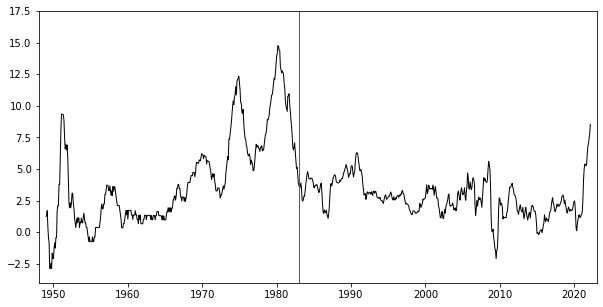

In [3]:
plt.figure(figsize=(10,5))
plt.plot(cpi.gr_cpi, color='k')
# plot vertical line on Jan 1983
plt.axvline(x=pd.to_datetime('1983-01-01'), color='tab:red')
# set y-axsis limit
plt.ylim(-4, 17.5)
# add padding
plt.xlim(pd.to_datetime('1948-01-01'), pd.to_datetime('2023-01-01'))

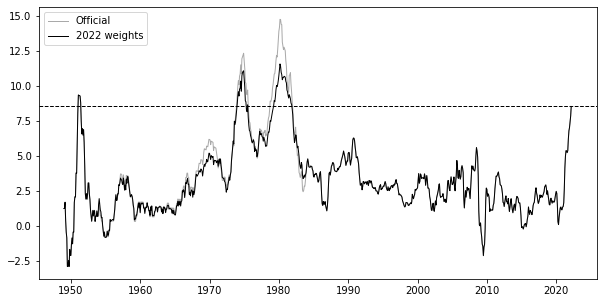

In [8]:
# set plot figure size
plt.figure(figsize=(10,5))
plt.plot(cpi.gr_cpi, label='Official', color='darkgrey')
plt.plot(cpi.gr_cpi_synth, label='2022 weights', color='k')
# plt.plot(cpi.gr_cpi_synth, label='OER correction')
# plot horizontal line
plt.axhline(y=cpi.gr_cpi[-1], color='k', linestyle='--')
# set legend
plt.legend(loc='upper left')

In [7]:
ffr = pd.read_csv('data/FEDFUNDS.csv')
ffr['DATE'] = pd.to_datetime(ffr['DATE'])
ffr = ffr.set_index('DATE')
cpi_with_ffr = cpi[['gr_cpi_core_synth_2021','gr_cpi_core']].join(ffr, how='inner')

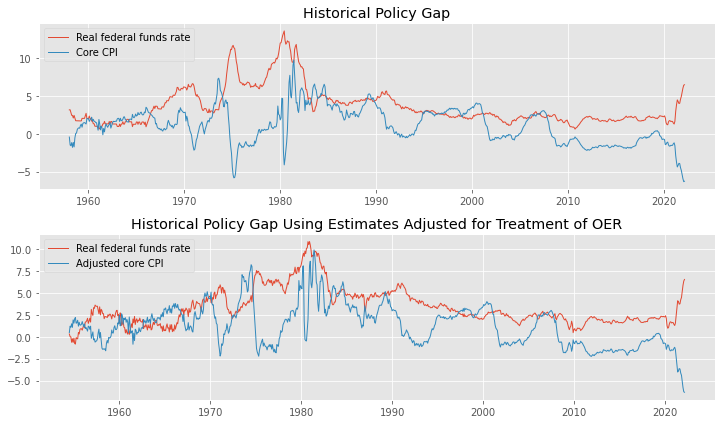

In [34]:
# set figure size
plt.figure(figsize=(10,6))

# plot subplots
plt.subplot(2,1,1)

plt.plot(cpi_with_ffr.gr_cpi_core, label='Real federal funds rate')
plt.plot(cpi_with_ffr.FEDFUNDS-cpi_with_ffr.gr_cpi_core, label='Core CPI')
plt.title('Historical Policy Gap')
plt.legend(loc='upper left')

# plot subplots
plt.subplot(2,1,2)

plt.plot(cpi_with_ffr.gr_cpi_core_synth_2021, label='Real federal funds rate')
plt.plot(cpi_with_ffr.FEDFUNDS-cpi_with_ffr.gr_cpi_core_synth_2021, label='Adjusted core CPI')
plt.title('Historical Policy Gap Using Estimates Adjusted for Treatment of OER')
plt.legend(loc='upper left')

# tight plot
plt.tight_layout()
